In [1]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib as mpl
import matplotlib.patches as mpl_patches
import matplotlib.cm as cm
import matplotlib.lines as mlines
import re
import nltk
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
tqdm.pandas()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
     

In [2]:
df = pd.read_csv('extracted_csv01.csv')
df

,src,tgt
0,"Upon its arrival in Canberra , the Olympic fla...",Chinese officials handed over the Olympic flam...
1,"She , in turn , offered them a message stick ,...","As a gesture of peace and welcome , she presen..."
2,Hundreds of pro-Tibet protesters and thousands...,"According to reports , hundreds of demonstrato..."
3,Demonstrators and counter-demonstrators were k...,The Australian Federal Police prevented demons...
4,Preparations for the event were marred by a di...,A dispute between Australian and Chinese offic...
...,...,...
172054,He wants to see prices brought down across the...,He desires a reduction in prices across all ca...
172055,"Costs: The Department for Environment , Food a...","The Department for Environment , Food and Rura..."
172056,Details of the action on water bills are expec...,Downing Street is expected to reveal specifics...
172057,Chancellor George Osborne signalled the govern...,"In a speech last month , Chancellor George Osb..."


In [3]:
df['src_char_count'] = df['src'].astype('str').apply(lambda x:len(x))
df['tgt_char_count'] = df['tgt'].astype('str').apply(lambda x:len(x))
df['src_word_count'] = df['src'].astype('str').apply(lambda x:len(x.split()))
df['tgt_word_count'] = df['tgt'].astype('str').apply(lambda x:len(x.split()))
df.sample(5)

,src,tgt,src_char_count,tgt_char_count,src_word_count,tgt_word_count
57746,The Reserve includes the bays of Grand Cul de ...,The Reserve encompasses the bays of Grand Cul ...,208,217,43,44
108570,The documents say her body was found with neck...,The papers indicate that her corpse was discov...,191,227,35,39
130210,The sitting Tory MP would stand as a Tory-Ukip...,The Conservative MP who is currently in office...,58,105,11,18
40975,"In November , Nasser brokered an agreement bet...",Nasser facilitated a deal in November between ...,175,171,28,26
122306,The report found groups of men aged 14 to 70 t...,"According to the report , vulnerable children ...",167,177,29,31


In [4]:
def plot_scatter(df,feat_1,feat_2,title):
    fig,axs = plt.subplots(figsize=(10,10))
    x = sorted(list(df[feat_1]))
    y = sorted(list(df[feat_2]))
    random_color = (random.random(), random.random(), random.random())

    axs.scatter(x,y,marker=".",label=feat_1,color=random_color)
    line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
    transform = axs.transAxes
    line.set_transform(transform)
    axs.add_line(line)
    axs.set_ylabel(feat_2)
    axs.grid()
    axs.set_xlabel(feat_1)
    axs.annotate(f"Correlation Score:{round((np.corrcoef(x,y)[0][1]),4)}", xy=(0.7, 0.5), xycoords='axes fraction',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center', fontsize=16)
    if title:
        plt.title(title)
    plt.show()

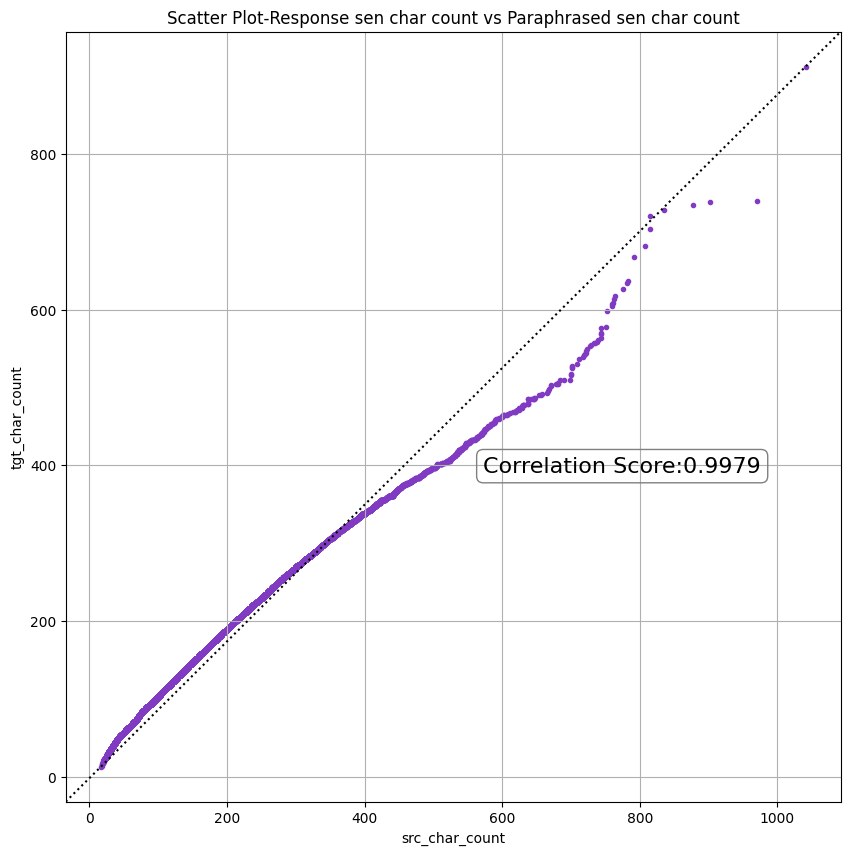

In [5]:
plot_scatter(df,'src_char_count','tgt_char_count',title='Scatter Plot-Response sen char count vs Paraphrased sen char count')

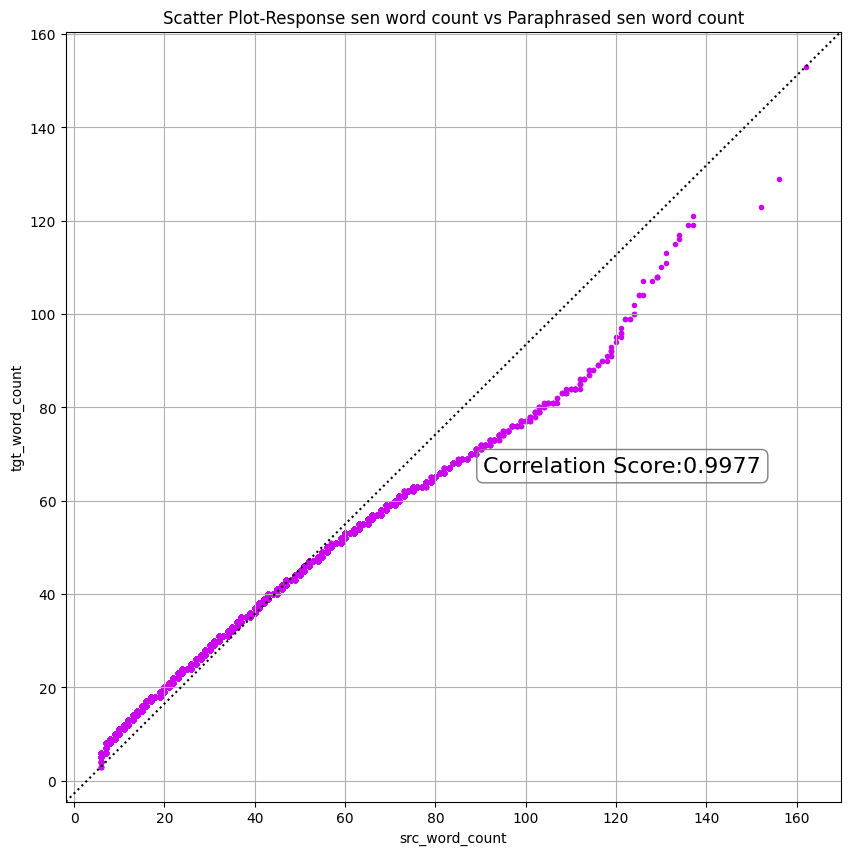

In [6]:
plot_scatter(df,'src_word_count','tgt_word_count','Scatter Plot-Response sen word count vs Paraphrased sen word count')

In [7]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
df['src_sen_polarity_score'] = df['src'].apply(polarity)
df['tgt_sen_polarity_score'] = df['tgt'].astype(str).apply(polarity)

In [9]:
def sentiment(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
df['src_sen_polarity'] = df['src_sen_polarity_score'].apply(sentiment)
df['tgt_sen_polarity'] = df['tgt_sen_polarity_score'].apply(sentiment)

In [11]:
def plot_polarity(polarity,title=None):
    fig,ax = plt.subplots(figsize =(10, 7))
    labels_Class_Disb = polarity.value_counts().index
    sizes_Class_Disb = polarity.value_counts()
    pcts_Class_Disb = [f'{l}-{s} Points \n({s*100/sum(sizes_Class_Disb):.2f}%)' for s,l in zip(sizes_Class_Disb, labels_Class_Disb)] 
    ax.pie(sizes_Class_Disb, labels = pcts_Class_Disb,startangle = 90, 
        explode=(0.05,0.05,0.05),colors = ('gray','#2a9d8f','#e76f51',), textprops = {"fontsize":12} )
    if title:
        plt.suptitle(title ,fontsize = 15)
    plt.title(f'(No Of Data Points:{sum(sizes_Class_Disb)}) ', fontsize = 12)
    plt.show()

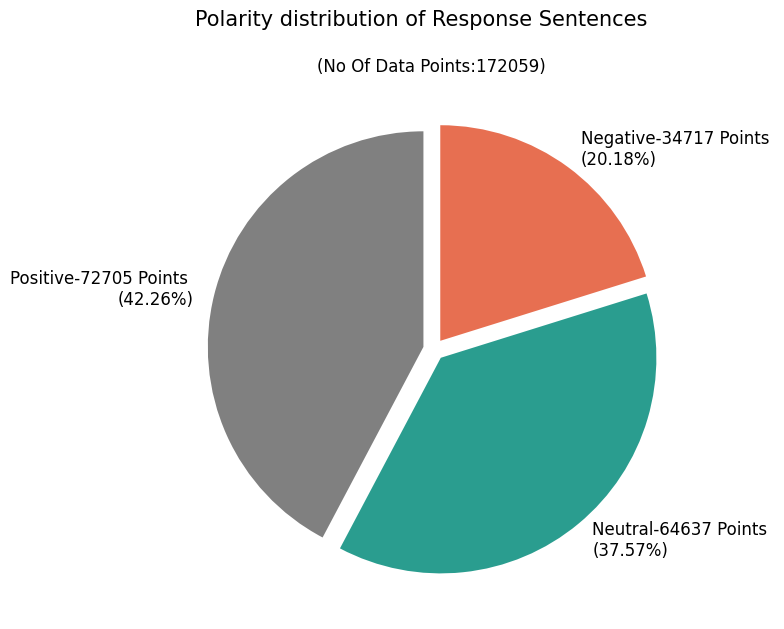

In [12]:
plot_polarity(df['src_sen_polarity'],'Polarity distribution of Response Sentences')
  

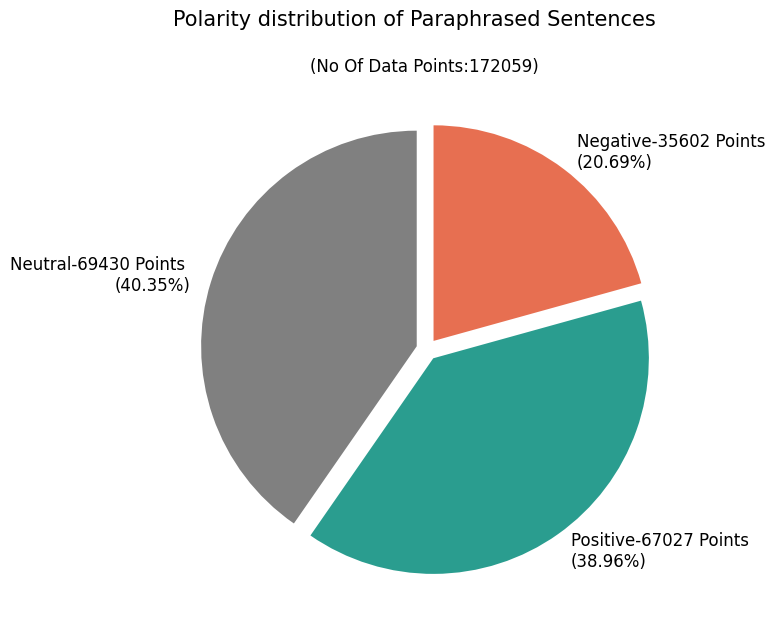

In [13]:
plot_polarity(df['tgt_sen_polarity'],'Polarity distribution of Paraphrased Sentences')

In [14]:
def plot_univariate(df,feature_name):
    random_color = (random.random(), random.random(), random.random())
    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

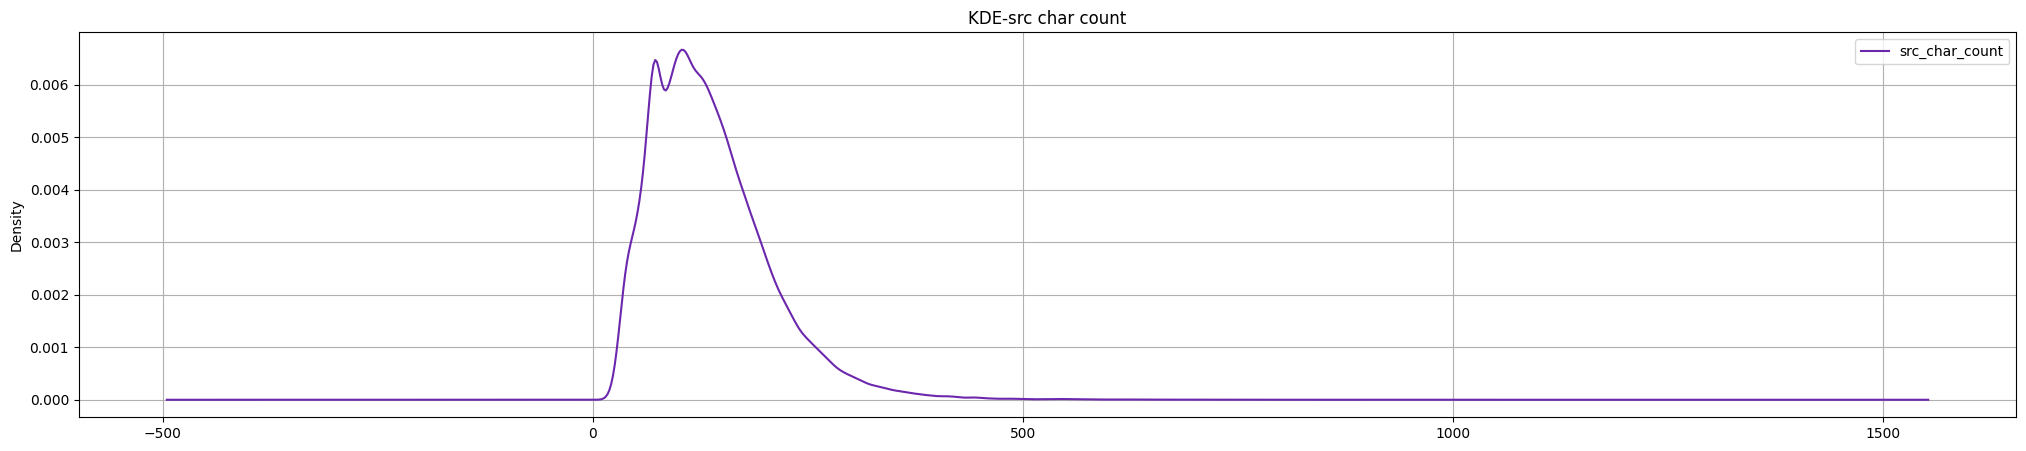

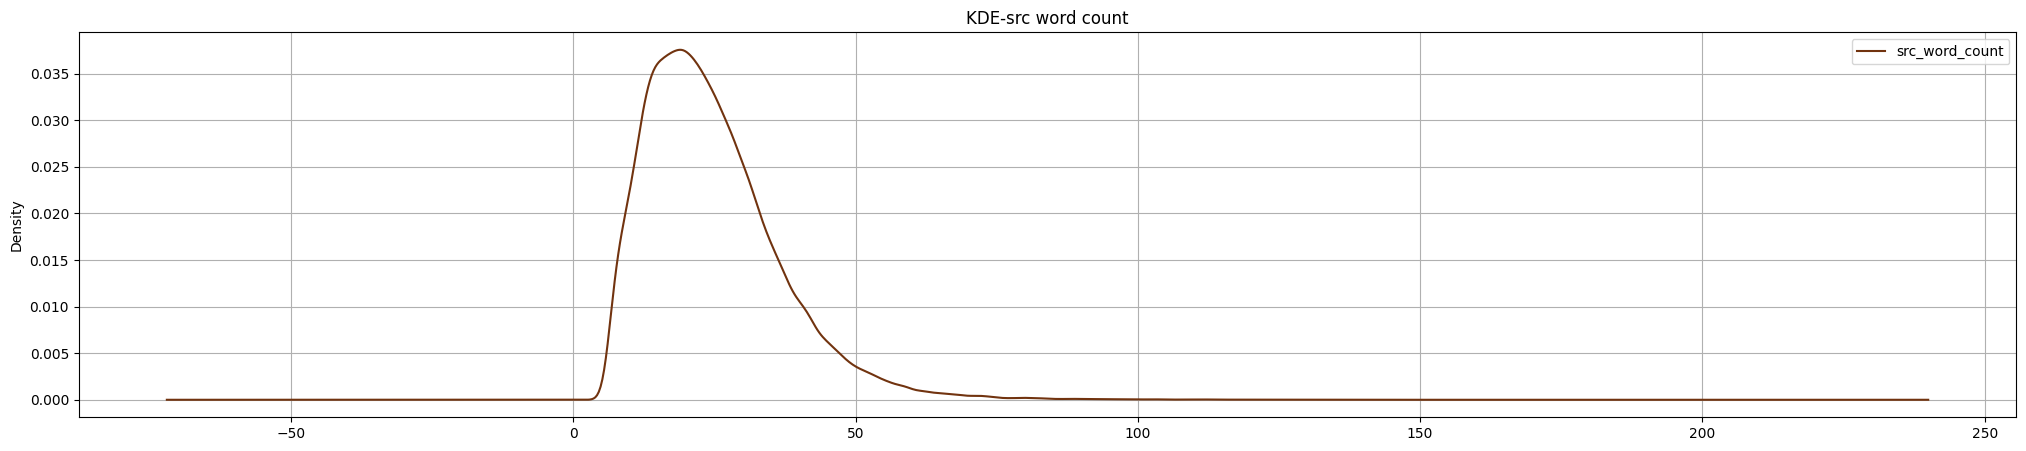

In [15]:
plot_univariate(df,'src_char_count')
plot_univariate(df,'src_word_count')

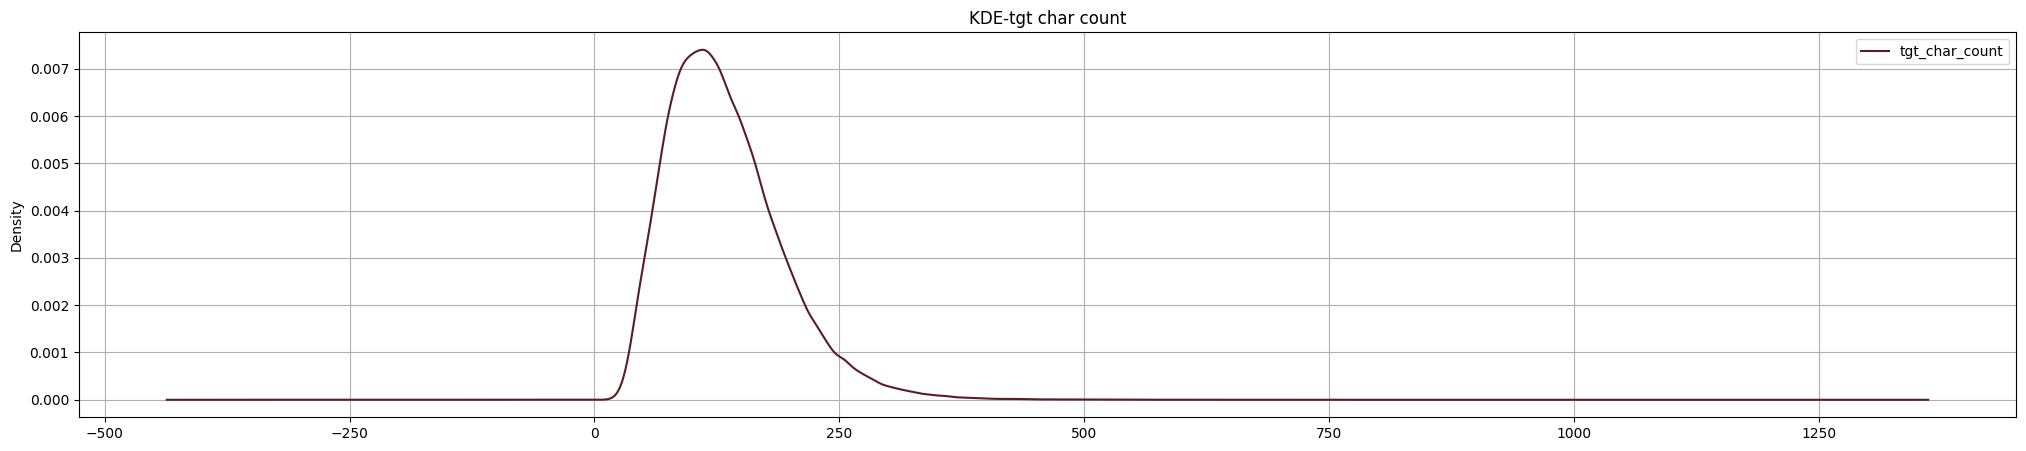

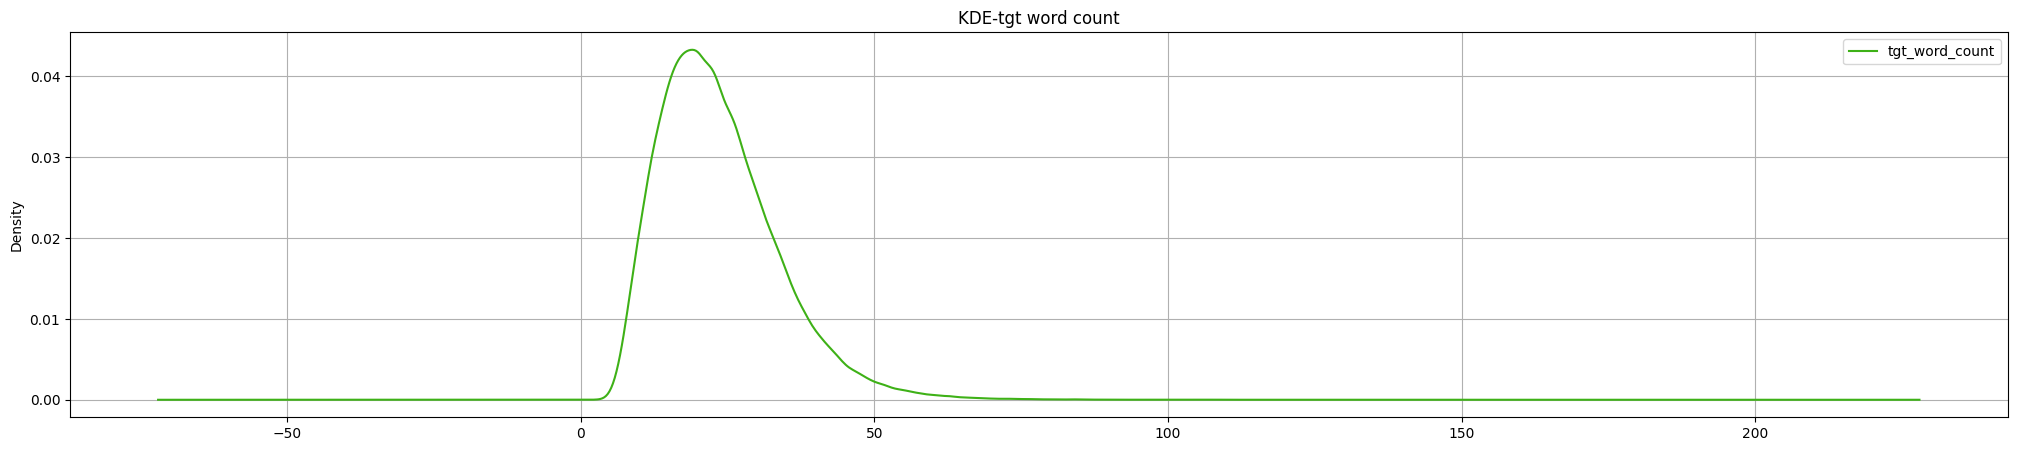

In [16]:
plot_univariate(df,'tgt_char_count')
plot_univariate(df,'tgt_word_count')

In [17]:
print(df['src_char_count'].describe())
print(df['tgt_char_count'].describe())

count    172059.000000
mean        136.726251
std          69.797589
min          17.000000
25%          86.000000
50%         125.000000
75%         173.000000
max        1041.000000
Name: src_char_count, dtype: float64
count    172059.000000
mean        133.473320
std          58.638818
min          13.000000
25%          91.000000
50%         125.000000
75%         166.000000
max         912.000000
Name: tgt_char_count, dtype: float64


In [18]:
print(df['src_word_count'].describe())
print(df['tgt_word_count'].describe())

count    172059.000000
mean         24.643861
std          12.055711
min           6.000000
25%          16.000000
50%          23.000000
75%          31.000000
max         162.000000
Name: src_word_count, dtype: float64
count    172059.000000
mean         23.513446
std          10.122104
min           3.000000
25%          16.000000
50%          22.000000
75%          29.000000
max         153.000000
Name: tgt_word_count, dtype: float64


In [19]:
df.to_csv('explored_csv03.csv', index=False)

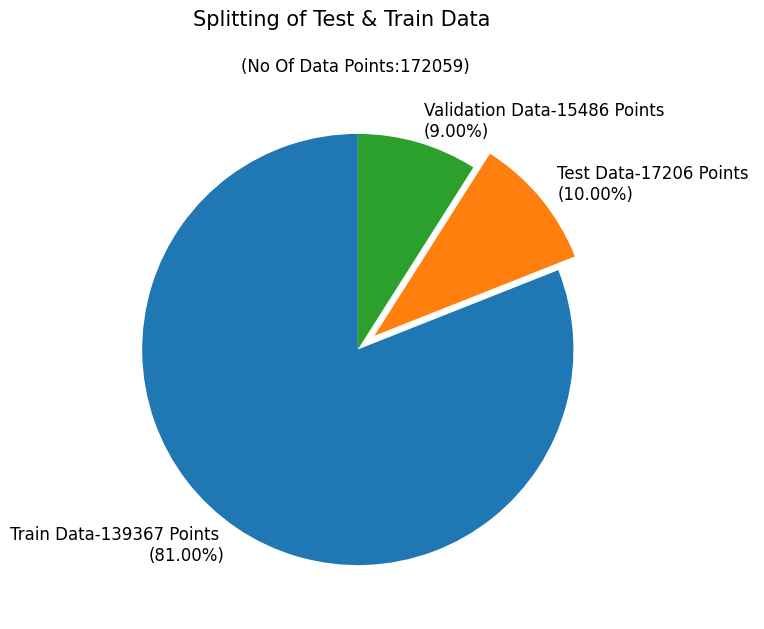

In [20]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.1)
train,validation = train_test_split(train, test_size=0.1)
fig,ax = plt.subplots(figsize =(10, 7))
labels_split = ['Train', 'Test','Validation'] 
sizes_split = [len(train),len(test),len(validation)]
pcts_split = [f'{l} Data-{s} Points \n({s*100/sum(sizes_split):.2f}%)' for s,l in zip(sizes_split, labels_split)] 
ax.pie(sizes_split, labels = pcts_split, startangle = 90, 
       explode=(0,0.1,0),textprops = {"fontsize":12} )

plt.suptitle(f'Splitting of Test & Train Data ', fontsize = 15)
plt.title(f'(No Of Data Points:{sum(sizes_split)}) ', fontsize = 12)
plt.show()

In [ ]:
# train.to_csv('train03.csv')
# validation.to_csv('val03.csv')
# test.to_csv('test03.csv')